# Выпускная квалификационная работа по курсу «Data Science»

В ходе выполнения ВКР требуется сделать:
* Изучить теоретические основы и методы решения поставленной задачи.
* Провести разведочный анализ предложенных данных. Необходимо нарисовать гистограммы распределения каждой из переменной, диаграммы ящика с усами, попарные графики рассеяния точек. Необходимо также для каждой колонке получить среднее, медианное значение, провести анализ и исключение выбросов, проверить наличие пропусков.
* Провести предобработку данных (удаление шумов, нормализация и т.д.).
* Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении. При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.
* Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель. 
* Разработать приложение с графическим интерфейсом или интерфейсом командной строки, которое будет выдавать прогноз, полученный в задании 4 или 5 (один или два прогноза, на выбор учащегося).
* Оценить точность модели на тренировочном и тестовом датасете. 
* Создать репозиторий в GitHub / GitLab и разместить там код исследования. Оформить файл README.

## Изучить теоретические основы и методы решения поставленной задачи

Имеется следующая информация по теоретическим основам поставленной задачи:

> Тема: Прогнозирование конечных свойств новых материалов (композиционных материалов).
> 
> Описание: 
> Композиционные материалы — это искусственно созданные материалы, состоящие из нескольких других с четкой границей между ними. 
> 
> При этом композиты являются монолитным материалом, т. е. компоненты материала неотделимы друг от друга без разрушения конструкции в целом. 
> 
> Их свойства определяются входящими в них компонентами, но отличаются от свойств компонентов, взятых в отдельности.
> 
> Композиционные материалы состоят из матрицы (основы) и наполнителя.
> 
> Матрица связывает композицию и в большей степени определяет технологические режимы получения материала и его эксплуатационные характеристики: рабочую температуру, плотность, удельную прочность, предел усталости.
> 
> Наполнитель, как правило, имеет высокие значения прочности, твердости и модуля упругости — значительно большие, чем показатели матрицы. Поэтому наполнитель является армирующим или упрочняющим элементом.
> 
> Композиты обладают теми свойствами, которые не наблюдаются у компонентов по отдельности. 
> 
> Даже если мы знаем характеристики исходных компонентов, определить характеристики композита, состоящего из этих компонентов, достаточно проблематично. Для решения этой проблемы есть два пути: физические испытания образцов материалов, или прогнозирование характеристик. Суть прогнозирования заключается в симуляции представительного элемента объема композита, на основе данных о характеристиках входящих компонентов (связующего и армирующего компонента). Созданные прогнозные модели помогут сократить количество проводимых испытаний, а также пополнить базу данных материалов возможными новыми характеристиками материалов, и цифровыми двойниками новых композитов.
> 
> Кейс основан на реальных производственных задачах Центра НТИ «Цифровое материаловедение: новые материалы и вещества» (структурное подразделение МГТУ им. Н.Э. Баумана).

<H1>Проведем разведочный анализ предложенных данных</H1>

В этом разделе необходимо:
* нарисовать гистограммы распределения каждой из переменной; 
* диаграммы ящика с усами;
* попарные графики рассеяния точек;
* для каждой колонки получить среднее, медианное значение;
* провести анализ и исключение выбросов;
* проверить наличие пропусков.

> Имеется датасет со свойствами композита. Рассматривается базальтопластик с нашивками из углепластика.
>
> На входе имеются данные о начальных свойствах компонентов композиционных материалов (количество связующего, наполнителя, температурный режим отверждения и т.д.). 
>
> На выходе необходимо спрогнозировать ряд конечных свойств получаемых композиционных материалов.
>
> Датасет состоит из двух файлов - X_bp (составляющая из базальтопластика) и Х_nup (составляющая из углепластика). Дано, что объединение делать по индексу тип объединения INNER.

In [2]:
nb_path = ''
data_path = '../data/'
models_path = '../models/'

In [3]:
%pip install seaborn
print('done') # используется для получения отклика интерпретатора python

done


In [4]:
# Импортирую необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import pickle
print('done') # используется для получения отклика интерпретатора python

done


In [ ]:
# Импорт библиотеки TensorFlow
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

In [5]:
# Определяю RANDOM_STATE для повторяемости результатов
RANDOM_STATE = 3128

In [6]:
%pip install openpyxl
print('done')# используется для получения отклика интерпретатора python

done


In [7]:
# Загружаем исходные данные из файла X_bp
X_bp = pd.read_excel(data_path + 'X_bp.xlsx', index_col=0)
X_bp.shape

(1023, 10)

In [8]:
# Загружаем исходные данные из файла X_nup
X_nup = pd.read_excel(data_path + 'X_nup.xlsx', index_col=0)
X_nup.shape

(1040, 3)

In [10]:
X_bp

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


Набор данных из файла X_bp содержит индекс + 10 признаков и 1023 строк.

Набор данных из файла X_nup содержит индекс + 3 признака и 1040 строк

Ознакамливаемся со списком признаков объединяемых наборов данных:

In [9]:
pd.DataFrame(X_bp.columns, columns=['X_bp признаки'])

,X_bp признаки
0,Соотношение матрица-наполнитель
1,"Плотность, кг/м3"
2,"модуль упругости, ГПа"
3,"Количество отвердителя, м.%"
4,"Содержание эпоксидных групп,%_2"
5,"Температура вспышки, С_2"
6,"Поверхностная плотность, г/м2"
7,"Модуль упругости при растяжении, ГПа"
8,"Прочность при растяжении, МПа"
9,"Потребление смолы, г/м2"


In [10]:
pd.DataFrame(X_nup.columns, columns=['X_nup признаки'])

,X_nup признаки
0,"Угол нашивки, град"
1,Шаг нашивки
2,Плотность нашивки


По заданию требуется объединить по типу INNER два набора данных в единый датасет.

In [11]:
# Выполним объединение датасета
df = X_bp.join(X_nup, how='inner') #‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’
df.shape

(1023, 13)

In [12]:
df.head(15).T # Посмотрим на результат объединения и выполним замену строк на столбцы для приведения фрейма к удобочитаемому виду

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Соотношение матрица-наполнитель,1.857143,1.857143,1.857143,1.857143,2.771331,2.767918,2.569620,2.561475,3.557018,3.532338,2.919678,2.877358,1.598174,2.919678,4.029126
"Плотность, кг/м3",2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2000.000000,1910.000000,1900.000000,1930.000000,2100.000000,2160.000000,1990.000000,1950.000000,1980.000000,1910.000000
"модуль упругости, ГПа",738.736842,738.736842,738.736842,738.736842,753.000000,748.000000,807.000000,535.000000,889.000000,1421.000000,933.000000,1628.000000,827.000000,568.000000,800.000000
"Количество отвердителя, м.%",30.000000,50.000000,49.900000,129.000000,111.860000,111.860000,111.860000,111.860000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
"Содержание эпоксидных групп,%_2",22.267857,23.750000,33.000000,21.250000,22.267857,22.267857,22.267857,22.267857,21.250000,21.250000,21.250000,21.250000,21.250000,21.250000,21.250000
"Температура вспышки, С_2",100.000000,284.615385,284.615385,300.000000,284.615385,284.615385,284.615385,284.615385,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
"Поверхностная плотность, г/м2",210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,380.000000,380.000000,1010.000000,1010.000000,1010.000000,470.000000,470.000000,470.000000
"Модуль упругости при растяжении, ГПа",70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,75.000000,75.000000,78.000000,78.000000,78.000000,73.333333,73.333333,73.333333
"Прочность при растяжении, МПа",3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,1800.000000,1800.000000,2000.000000,2000.000000,2000.000000,2455.555556,2455.555556,2455.555556
"Потребление смолы, г/м2",220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,120.000000,120.000000,300.000000,300.000000,300.000000,220.000000,220.000000,220.000000


<p>Перед нами многомерный набор данных.</p>
<p>После объединения двух датасетов в наборе получилось 1023 строки, часть строк из таблицы X_nup была отброшена. </p>
<p>Если бы при объединении таблиц использовались типы соединений left (в случае если X_nup слева), right, outer то данные у которых не было соответствия заполнились бы пустыми значениями - NULL.
Потребовалось бы заполнять данные поля, например, средними значениями или удалить их из множества наблюдений.</p>

In [13]:
# Сохраню объединенные данные
df.to_excel(data_path + 'data_merged.xlsx')

In [14]:
# Узнаем типы данных признаков
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

Все признаки имеют тип float64, строковых данных нет.

In [15]:
# Выполняем проверку строк на пропуски
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Пропусков нет.

In [16]:
# Количество уникальных значений в каждом столбце
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

<p>Пропусков и дубликатов в датасете выявлено не было. Все параметры, за исключением угла нашивки, имеют тип – число с плавающей точкой. 
Тип параметра «Угол нашивки, град» является целым числом. Из полученных данных видно, что строка наблюдений «Угол нашивки, град» имеет всего 2 уникальных значения. Имеет смысл преобразовать в категориальный признак

In [17]:
%pip install Jinja2
print('done') # используется для получения отклика интерпретатора python

done


In [18]:
# Смотрим описательную статистику фрейма
df_descr = df.describe().T # создадим копию датафрейма в удобочитаемом виде(выполняем транспонирование исходного фрейма)
df_descr['median'] = df.median() # посчитаем и добавим значение медианы в датафрейм как указано в задании
df_descr.style.format(precision=4)

,count,mean,std,min,25%,50%,75%,max,median
Соотношение матрица-наполнитель,1023.0000,2.9304,0.9132,0.3894,2.3179,2.9069,3.5527,5.5917,2.9069
"Плотность, кг/м3",1023.0000,1975.7349,73.7292,1731.7646,1924.1555,1977.6217,2021.3744,2207.7735,1977.6217
"модуль упругости, ГПа",1023.0000,739.9232,330.2316,2.4369,500.0475,739.6643,961.8125,1911.5365,739.6643
"Количество отвердителя, м.%",1023.0000,110.5708,28.2959,17.7403,92.4435,110.5648,129.7304,198.9532,110.5648
"Содержание эпоксидных групп,%_2",1023.0000,22.2444,2.4063,14.2550,20.6080,22.2307,23.9619,33.0000,22.2307
"Температура вспышки, С_2",1023.0000,285.8822,40.9433,100.0000,259.0665,285.8968,313.0021,413.2734,285.8968
"Поверхностная плотность, г/м2",1023.0000,482.7318,281.3147,0.6037,266.8166,451.8644,693.2250,1399.5424,451.8644
"Модуль упругости при растяжении, ГПа",1023.0000,73.3286,3.1190,64.0541,71.2450,73.2688,75.3566,82.6821,73.2688
"Прочность при растяжении, МПа",1023.0000,2466.9228,485.6280,1036.8566,2135.8504,2459.5245,2767.1931,3848.4367,2459.5245
"Потребление смолы, г/м2",1023.0000,218.4231,59.7359,33.8030,179.6275,219.1989,257.4817,414.5906,219.1989


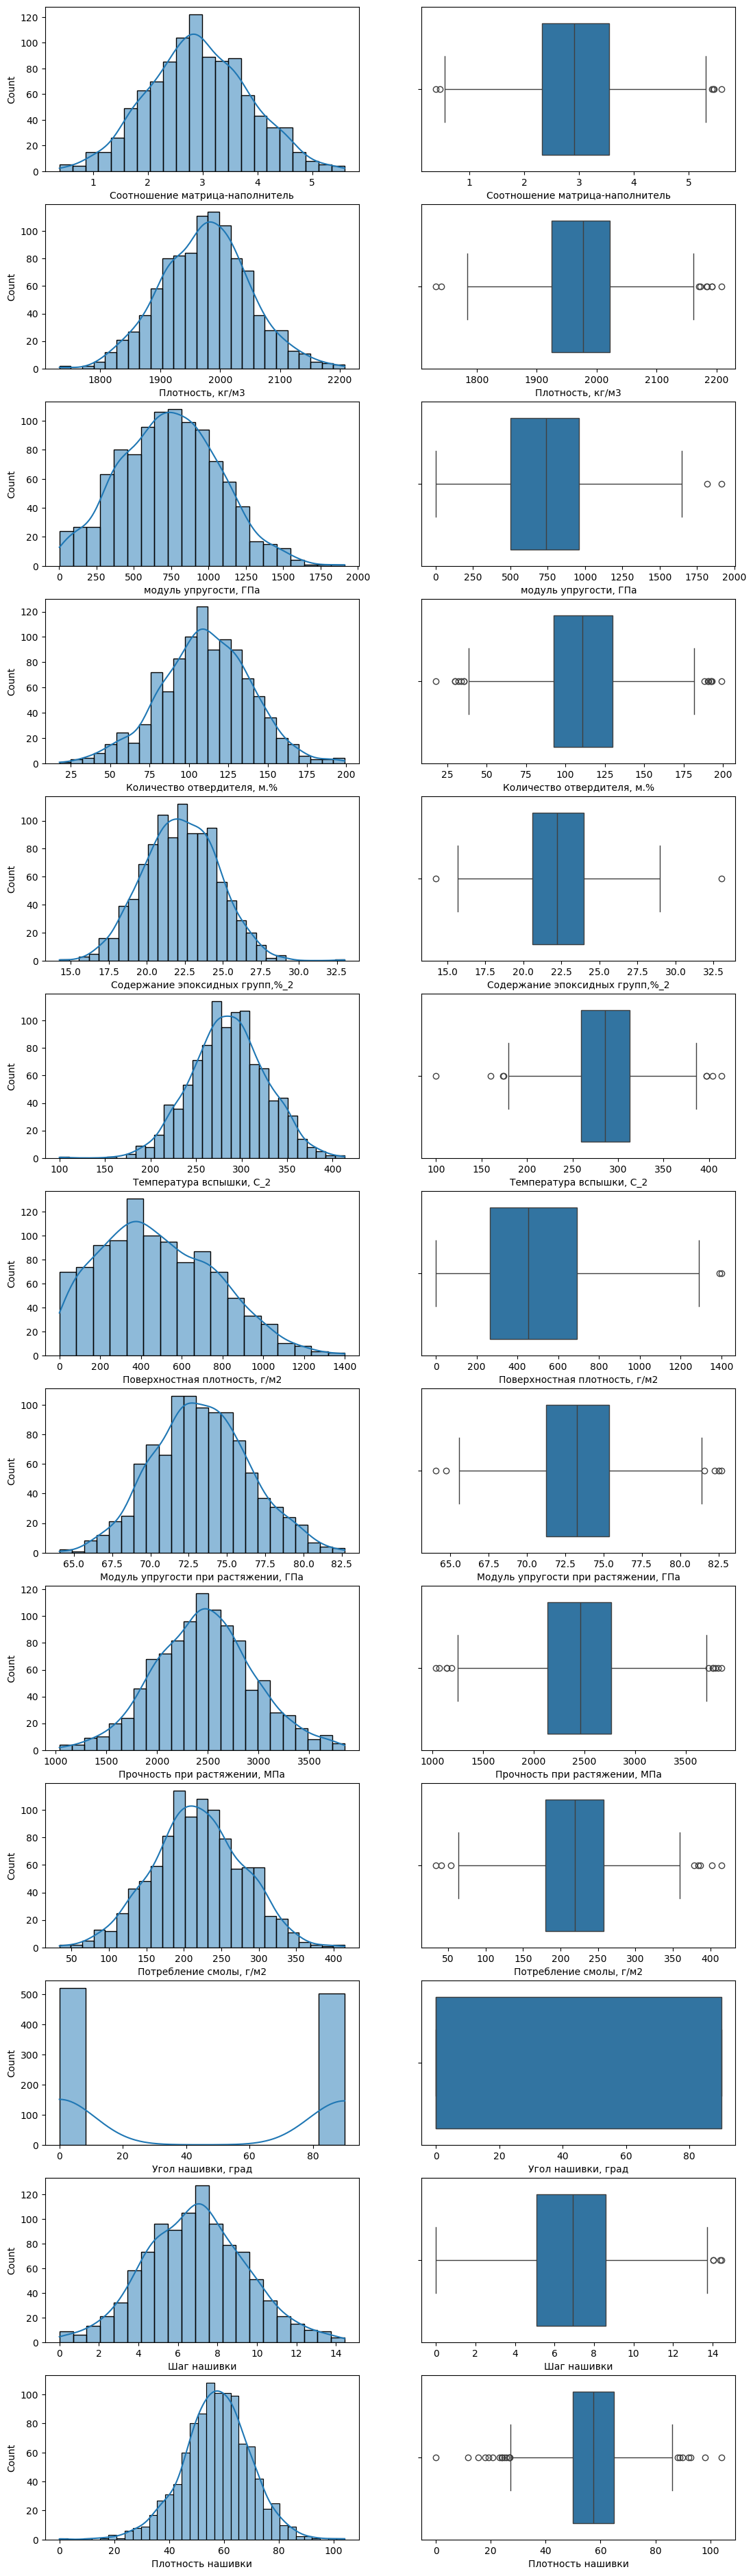

In [20]:
# Выполним построение графиков распределения переменных и boxplot
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=df, x=column, ax=axes[k, 1])
plt.show()

На примере полученных графиков видно что распределение данных подчиняется нормальному распределению - "закону Гаусса".

In [19]:
df.shape

(1023, 13)

In [ ]:
# Построим попарные графики рассеивания для визуализации и анализа взаимосвязи между двумя переменными, а также оценки разброса.
sns.pairplot(df, diag_kind='kde', height=3);

<p>На графиках видно, что есть точки, которые сильно отклоняются от общей тенденции и скорее всего являются выбросами.</p>

Для поиска выбросов будем использовать следующие методы: Z-score оценки (метод 3-х сигм) или межквартильных расстояний.
Проведем эксперимент для получения результатов работы методов и принятия решения по выбросам.

Соотношение матрица-наполнитель: 3s=0 iq=0


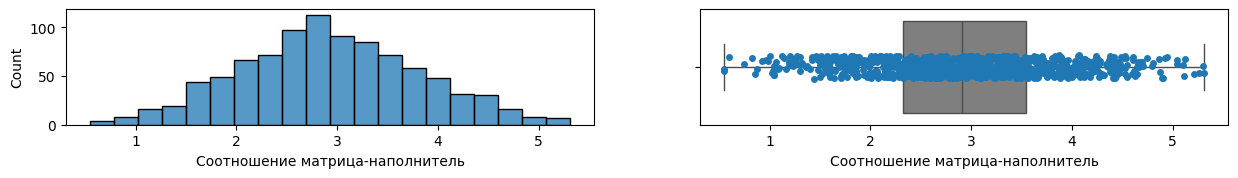

Плотность, кг/м3: 3s=0 iq=0


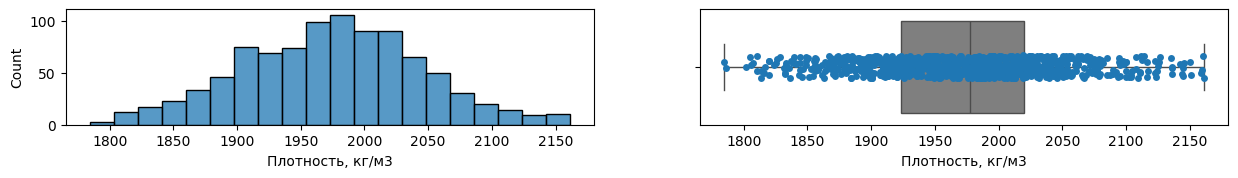

модуль упругости, ГПа: 3s=0 iq=1


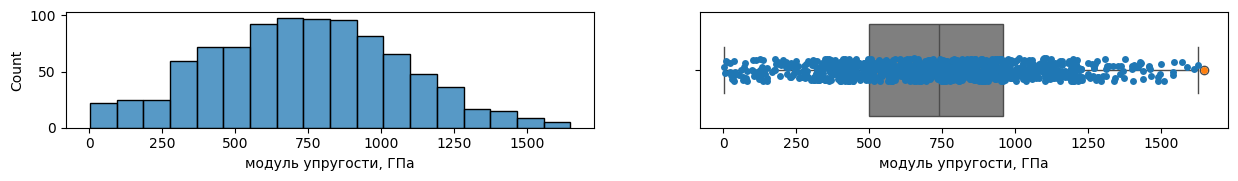

Количество отвердителя, м.%: 3s=0 iq=0


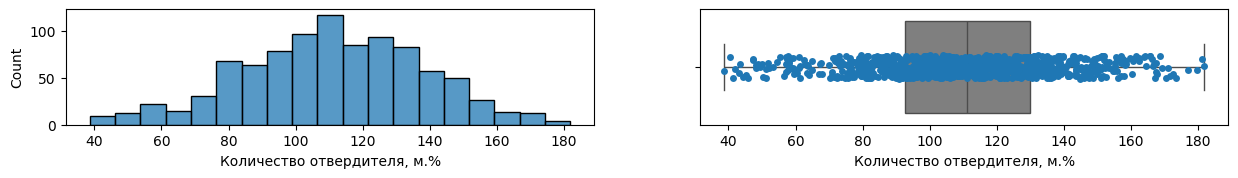

Содержание эпоксидных групп,%_2: 3s=0 iq=0


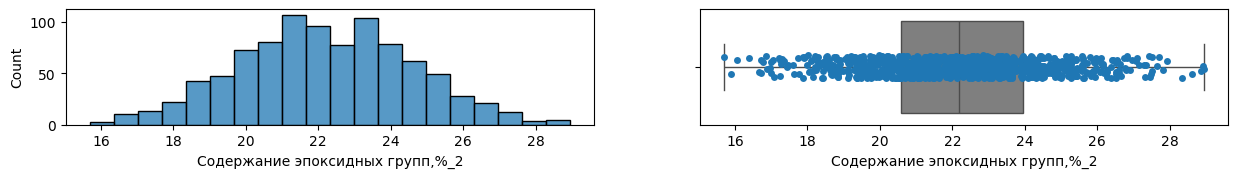

Температура вспышки, С_2: 3s=0 iq=0


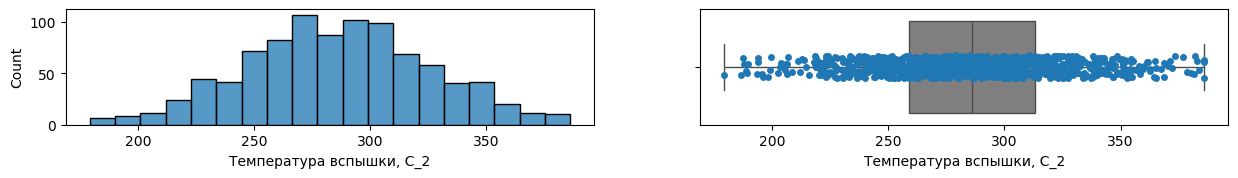

Поверхностная плотность, г/м2: 3s=0 iq=0


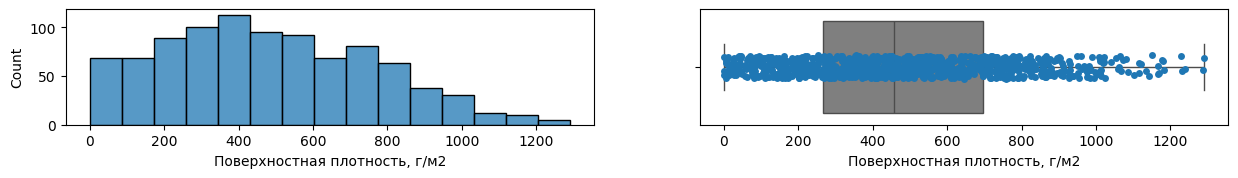

Модуль упругости при растяжении, ГПа: 3s=0 iq=1


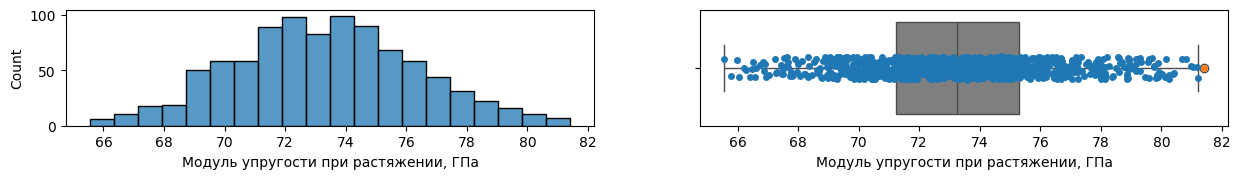

Прочность при растяжении, МПа: 3s=0 iq=4


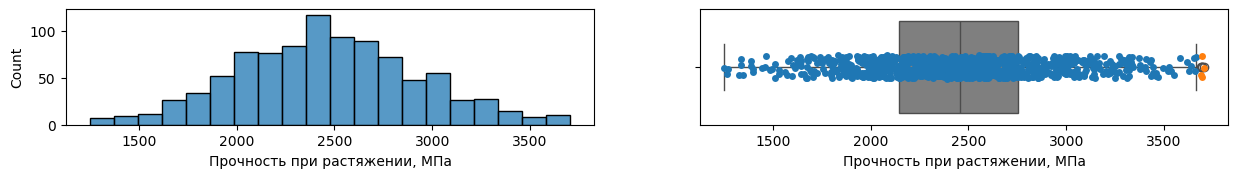

Потребление смолы, г/м2: 3s=0 iq=1


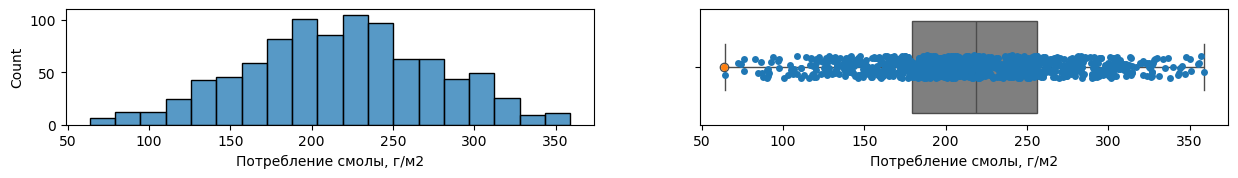

Угол нашивки, град: 3s=0 iq=0


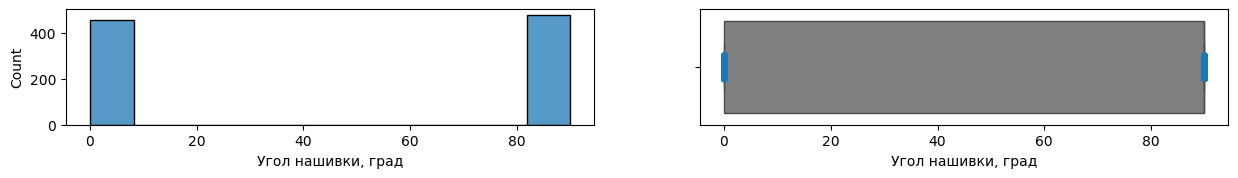

Шаг нашивки: 3s=0 iq=0


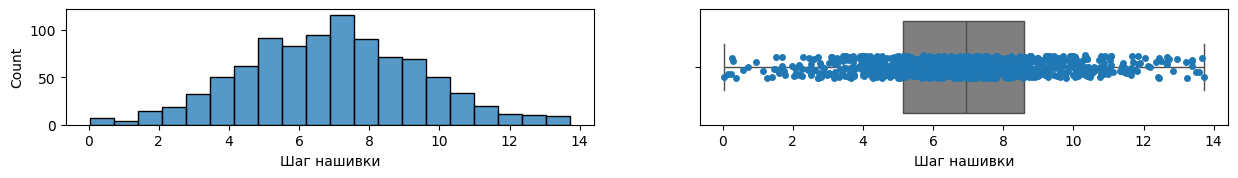

Плотность нашивки: 3s=0 iq=3


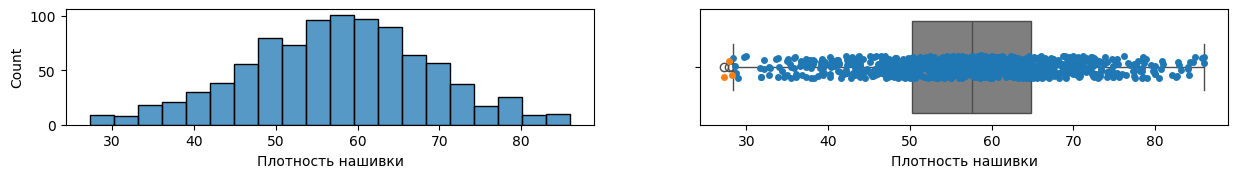

Метод 3-х сигм, выбросов: 0
Метод межквартильных расстояний, выбросов: 10


In [157]:
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методом межквартильных расстояний
    q1,q3=np.quantile(df[column],[0.25,0.75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
    # визуализация выбросов
    print('{}: 3s={} iq={}'.format(column, d['3s'].sum(), d['iq'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(15, 1.5))
    sns.histplot(data=d, x=column, hue='3s', multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column, color='tab:gray', ax=axes[1])
    sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['iq']==True], x=column, color='tab:orange', ax=axes[1])
    plt.show()

print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

Результат:
* Метод 3-х сигм, выбросов по всем переменным: 24
* Метод межквартильных расстояний, выбросов по всем переменным: 93

Для обработки выбросов можно использовать 3 стратегии. Их можно отбросить, пометить как выбросы и включить в качестве признака либо преобразовать признак, чтобы ослабить эффект выброса.

Метод "3 сигм" основан на использовании стандартного отклонения для определения выбросов. Если данные имеют нормальное распределение, то метод "3 сигм" может быть более подходящим, так как он учитывает стандартное отклонение, которое является характеристикой нормального распределения.
К тому же метод 3-х сигм показал меньшее количество выбросов, соответственно при исключении выбросов мы потеряем меньше информации. 

In [20]:
# Удаляес выбросы методом 3-х сигм
outliers = pd.DataFrame(index=df.index)
for column in df:
    zscore = (df[column] - df[column].mean()) / df[column].std()
    outliers[column] = (zscore.abs() > 3)
df = df[outliers.sum(axis=1)==0]
df.shape

(1000, 13)

<p>Выбросы удалены</p>

In [21]:
# Очищенные данные тоже стоит сохранить
df.to_excel(data_path + 'data_cleaned.xlsx')

<p style="color:">На стадии анализа данных зависимость между переменными не выявлена, и это может означать несколько вещей: 
<ul><li>Во-первых, возможно, что данные не содержат достаточно информации для выявления такой зависимости. В этом случае может потребоваться дополнительный сбор данных или использование других методов анализа данных.<li>Во-вторых, возможно, что зависимость между переменными слишком сложна или нелинейна, и существующие методы анализа данных не могут ее выявить. В этом случае может потребоваться использование более сложных моделей машинного обучения или специализированных методов анализа данных.</li></ul>
В любом случае, если зависимость между переменными не выявлена, это не означает, что ее не существует,  и можно провести, например, анализ корреляции, выполнив построение тепловой карты.</p>

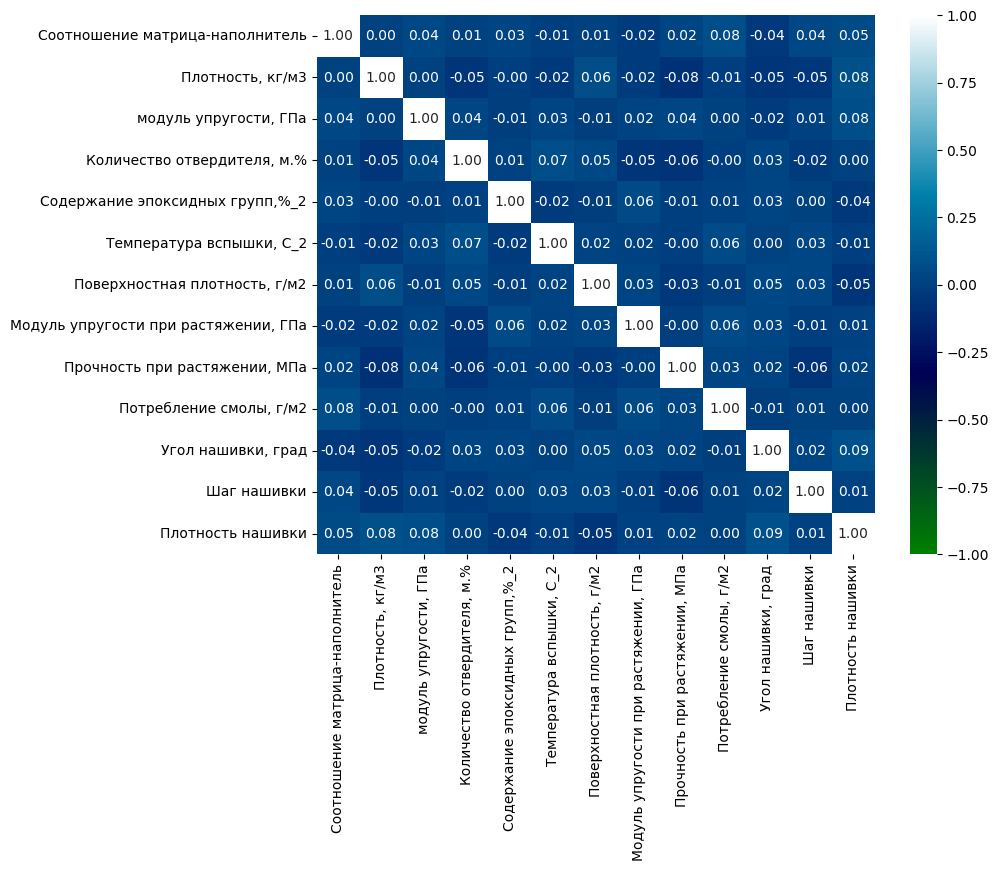

In [165]:
# Определяем корреляцию между параметрами
corr = df.corr()
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='ocean', ax=ax)
plt.show()

На тепловой карте видно, что коэффициенты корреляции, находятся около 0, и показывают отсутствие линейной зависимости между признаками, как между входными так и входными и выходными.


<p>В этом случае, для анализа данных и предсказания будущих значений, лучше использовать алгоритмы машинного обучения, которые не требуют сильной зависимости между входными и выходными данными.

Например, к таким алгоритмам для задачи регрессии относятся:
<ol>
<li>Методы случайного леса.</li>

<li>Методы градиентного бустинга.</li>

<li>Методы глубокого обучения: глубокое обучение - это метод, который используют нейронные сети для анализа данных.</li></ol>

Проведем исследование, предобработку данных и выберем наиболее подходящий алгоритм для нашей задачи.</p>

<H1>Предобработка данных (Препроцессинг)</H1>

Выполнение предобработки данных может существенно повлиять на качество обучения модели. 
В этом разделе необходимо:
* разделить данные на входные и выходные признаки
* разделить данные на категориальные и численные
* выполнить масштабирование данных

In [73]:
# Загрузить данные, подготовленные на предыдущем шаге
df = pd.read_excel(data_path + 'data_cleaned.xlsx', index_col=0)

<h3>Формируем датасеты для тренировки моделей</h3>

<p>Поскольку мы имеем дело с многомерным набором данных, то первым делом на данном этапе необходимо выполнить разделение признаков на входные и выходные.
Входные будем использовать для обучения модели.
Обратимся к заданию. Нам нужно выбрать алгоритм и обучить 2 модели машинного обучения для предсказания значений модуля упругости и прочности при растяжении, а также выполнить настройку модели нейронной сети, которая будет рекомендовать значение соотношение матрица-наполнитель.  
Таким образом нужно определить 3 конфигурации признаков в датасете для каждой из моделей.</p>
<p>Исходя из технологического процесса создания композиционного материала, а также стоящих перед нами задач, для определения прочности и упругости соединения при растяжении нам потребуются свойства матрицы, наполнителя, а также соотношение матрица-наполнитель.
<br>На этапе проектирования композиционного материала инженеры выбирают оптимальное соотношение матрица-наполнитель для получения материала с нужными свойствами и минимальных затратах. Соответственно, если у нас имеются требуемые значения упругости и прочности комозитного материала, то инженеру для определения соотношения матрица-наполнитель потребуются свойства матрицы, наполнителя и имеющиеся заданные характеристики материала. 
<br><br>Исходя из вышесказанного сформируем следующие конфигурации моделей.</p>

In [23]:
# Формируем конфигурацию признаков для модели нейронной сети
X = df.copy()
y = X.pop('Соотношение матрица-наполнитель')

In [30]:
# Убедимся в правильности набора признаков в конфигурации для модели нейронной сети
X.columns

Index(['Плотность, кг/м3', 'модуль упругости, ГПа',
       'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2',
       'Температура вспышки, С_2', 'Поверхностная плотность, г/м2',
       'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа',
       'Потребление смолы, г/м2', 'Угол нашивки, град', 'Шаг нашивки',
       'Плотность нашивки'],
      dtype='object')

In [36]:
# Признаки для 1-й задачи
#y1_columns = ['Модуль упругости при растяжении, ГПа']
#x1_columns = [
#  'Соотношение матрица-наполнитель', 
#  'Плотность, кг/м3',
#  'модуль упругости, ГПа', 
#  'Количество отвердителя, м.%',
#  'Содержание эпоксидных групп,%_2', 
#  'Температура вспышки, С_2',
#  'Поверхностная плотность, г/м2', 
#  'Потребление смолы, г/м2',
#  'Угол нашивки, град', 
#  'Шаг нашивки', 
#  'Плотность нашивки'
#]

In [37]:
#y1 = df.loc[:, y1_columns]
#x1 = df.loc[:, x1_columns]

In [38]:
# Признаки для 2-й задачи
#y2_columns = ['Прочность при растяжении, МПа']
#x2_columns = [
#  'Соотношение матрица-наполнитель', 
#  'Плотность, кг/м3',
#  'модуль упругости, ГПа', 
 # 'Количество отвердителя, м.%',
 # 'Содержание эпоксидных групп,%_2', 
 # 'Температура вспышки, С_2',
 # 'Поверхностная плотность, г/м2', 
 # 'Потребление смолы, г/м2',
 # 'Угол нашивки, град', 
 # 'Шаг нашивки', 
 # 'Плотность нашивки'
#]

In [39]:
#y2 = df.loc[:, y2_columns]
#x2 = df.loc[:, x2_columns]

In [41]:
# Признаки для 3-й задачи
#y3_columns = ['Соотношение матрица-наполнитель']
#x3_columns = [
#  'Плотность, кг/м3',
#  'модуль упругости, ГПа', 
#  'Количество отвердителя, м.%',
#  'Содержание эпоксидных групп,%_2', 
#  'Температура вспышки, С_2',
#  'Поверхностная плотность, г/м2', 
#  'Модуль упругости при растяжении, ГПа',
#  'Прочность при растяжении, МПа', 
#  'Потребление смолы, г/м2',
#  'Угол нашивки, град', 
#  'Шаг нашивки', 
#  'Плотность нашивки'
#]

In [42]:
#y3 = df.loc[:, y3_columns]
#x3 = df.loc[:, x3_columns]

In [43]:
# Разделю переменные на категориальные и численные
x_categorical = ['Угол нашивки, град']
x1_continuous = [column for column in x1_columns if column not in x_categorical]
x2_continuous = [column for column in x2_columns if column not in x_categorical]
x3_continuous = [column for column in x3_columns if column not in x_categorical]

<h3>Создание препроцессора для шкалирования и категоризации признаков</h3>
Набор данных, который мы будем шкалировать многомерный, а также не имеет явных зависимостей между признаками.
В таком случае целесообразно применить StandardScaler, который преобразует значения каждого признака в стандартное отклонение, 
что позволит сравнить значения разных признаков. Если бы корреляция между признаками всё-таки была, то после применения StandardScaler 
признаки имели бы одинаковые значения стандартного отклонения, что привело бы к скрытию информации о взаимосвязи между ними. 

In [44]:
# Препроцессор для 1-й задачи
preprocessor1 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x1_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])

In [45]:
# Препроцессор для 2-й задачи
preprocessor2 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x2_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])

In [46]:
# Препроцессор для 3-й задачи
preprocessor3 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x3_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])

<h1>Разработка и обучение моделей</h1>

В данном разделе выполним:<ul>
<li>написание вспомогательных функций</li>
<li>обучение  моделей для прогноза модуля упругости при растяжении и прочности при растяжении.</li>
<li>разделение данных методом train_test_split с параметром test_size=0.3</li>
<li>поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, с KFold = 10.</li></ul>

<h3>Написание вспомогательных функций</h3>

Функции show_statistics, run_models, run_grid_search позволят пользоваться одним и тем же кодом в разных частях Notebook'a, а также сделает 
его более читаемым.

In [47]:
# Функция сравнения распределения признаков до и после обработки 
def show_statistics(d):
    return d.describe().loc[['min', 'max', 'mean', 'std'], :].style.format(precision=6)

In [ ]:
Определение метрик

In [48]:
def run_models(models, x, y):
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE) #метод KFold делит все образцы на 10 блоков 
    scoring = ['r2', 
                'max_error', 
                'neg_root_mean_squared_error', 
                'neg_mean_absolute_error', 
                'neg_mean_absolute_percentage_error']
    for model_name, model in models.items():
        scores = cross_validate(model, x, y, cv=cv, scoring=scoring)
        stat.loc[model_name, 'R2'] = scores['test_r2'].mean()
        stat.loc[model_name, 'RMSE'] = scores['test_neg_root_mean_squared_error'].mean()
        stat.loc[model_name, 'MAE'] = scores['test_neg_mean_absolute_error'].mean()
        stat.loc[model_name, 'MAPE'] = scores['test_neg_mean_absolute_percentage_error'].mean()
        stat.loc[model_name, 'max_error'] = scores['test_max_error'].mean()
    return stat

In [49]:
def run_grid_search(model, params, x, y):
    pd.options.display.max_colwidth = 200
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE)
    # scoring = 'neg_root_mean_squared_error'
    scoring = 'neg_mean_absolute_error'
    searcher = GridSearchCV(model, params, cv=cv, scoring=scoring)
    searcher.fit(x, y)
    stat.loc[:, 'params'] = searcher.cv_results_['params']
    stat.loc[:, 'MAE'] = searcher.cv_results_['mean_test_score']
    stat.loc[:, 'rank'] = searcher.cv_results_['rank_test_score']
    return stat, searcher.best_estimator_

И еще одна вспомогательная функция для получения метрик предсказания.

In [50]:
def get_metrics(model_name, y, y_pred):
    stat = pd.DataFrame()
    stat.loc[model_name, 'R2'] = metrics.r2_score(y, y_pred)
    stat.loc[model_name, 'RMSE'] = metrics.mean_squared_error(y, y_pred, squared=False) * -1
    stat.loc[model_name, 'MAE'] = metrics.mean_absolute_error(y, y_pred) * -1
    stat.loc[model_name, 'MAPE'] = metrics.mean_absolute_percentage_error(y, y_pred) * -1
    stat.loc[model_name, 'max_error'] = metrics.max_error(y, y_pred) * -1
    return stat

Чтобы определить нижнюю границу качества модели, использую базовую модель, возвращающую среднее значение целевого признака. Рабочая модель по своим характеристикам должна быть лучше базовой. Можно для этой цели создать класс, унаследованный от BaseEstimator. А можно использовать DummyRegressor из sklearn.

<H1>Обучение моделей</H1>

### Модель для модуля упругости при растяжении, ГПа

In [51]:
# Разделяю на тренировочную и тестовую выборку
x1_train_raw, x1_test_raw, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=RANDOM_STATE)
print('x1_train:', x1_train_raw.shape, 'y1_train:', y1_train.shape)
print('x1_test:', x1_test_raw.shape, 'y1_test:', y1_test.shape)

x1_train: (700, 11) y1_train: (700, 1)
x1_test: (300, 11) y1_test: (300, 1)


Перед масштабированием датасета предупреждаем проблему утечки данных.
Если мы сразу отмасштабируем все данные (и обучающую, и тестовую выборки), то информация из тестовой части «утечет» в обучающую просто потому, что, в случае стандартизации, среднее и СКО будет рассчитываться на основе всех данных. Как следствие, модель на этапе обучения уже «увидит» тестовые данные, а значит качество модели «на тесте» может быть неоправданно завышено.

In [52]:
#производим рассчет занчений среднего арифметическое(st_scaler.mean_) и СКО(scaler.scale_) каждого из столбцов(.fit()) тренировочной выборки с 
#последующим использованием этих расчитанных значений для стандартизации(.transform()).
x1_train = preprocessor1.fit_transform(x1_train_raw)
#Использование расчитанных значений занчений среднего арифметическое(st_scaler.mean_) и СКО(MSE) каждого из столбцов(.fit()) тренировочной выборки
#для масштабирования тестовой выборки.
x1_test = preprocessor1.transform(x1_test_raw)

In [53]:
# Выходная переменная преобразованиям не подвергается
y1_train = y1_train['Модуль упругости при растяжении, ГПа'].values
y1_test = y1_test['Модуль упругости при растяжении, ГПа'].values

In [54]:
# Описательная статистика входных данных до предобработки
show_statistics(x1_train_raw)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
min,0.389403,1784.482245,4.339154,29.956150,15.881668,173.484920,1.668002,41.048278,0.000000,0.145034,20.571633
max,5.455566,2192.297637,1628.000000,192.851702,28.955094,403.652861,1291.340115,383.663401,90.000000,14.440522,89.876616
mean,2.907441,1972.568298,743.180523,110.927781,22.237431,286.158802,482.049370,218.246969,43.457143,6.890381,57.664603
std,0.908368,70.846531,326.626902,27.485979,2.347655,39.974223,273.399143,59.487795,45.005702,2.536808,11.880191


In [55]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x1_train, columns=(x1_continuous + x_categorical)))

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки,"Угол нашивки, град"
min,-2.774030,-2.656736,-2.263652,-2.948031,-2.709217,-2.820679,-1.758326,-2.980870,-2.660891,-3.124486,0.000000
max,2.807176,3.103701,2.710898,2.982703,2.863482,2.941347,2.962224,2.782667,2.978364,2.713344,1.000000
mean,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.482857
std,1.000715,1.000715,1.000715,1.000715,1.000715,1.000715,1.000715,1.000715,1.000715,1.000715,0.500063


In [57]:
# Описательная статистика выходной переменной
show_statistics(y1_train)

<class 'AttributeError'>: 'numpy.ndarray' object has no attribute 'describe'

In [59]:
# Сравнение моделей с параметрами по умолчанию
def_models1 = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'RandomForestRegressor': RandomForestRegressor(random_state=RANDOM_STATE)
}

stat1_1 = run_models(def_models1, x1_train, y1_train)
stat1_1.style.highlight_max(axis=0)

,R2,RMSE,MAE,MAPE,max_error
DummyRegressor,-0.021502,-3.059339,-2.465060,-0.033641,-8.053111
LinearRegression,-0.022620,-3.059379,-2.464305,-0.033641,-8.139731
Ridge,-0.022538,-3.059264,-2.464226,-0.033640,-8.139352
Lasso,-0.021502,-3.059339,-2.465060,-0.033641,-8.053111
SVR,-0.037763,-3.082058,-2.472179,-0.033767,-8.146369
KNeighborsRegressor,-0.197298,-3.312241,-2.624624,-0.035795,-8.876770
DecisionTreeRegressor,-1.229594,-4.485293,-3.545377,-0.048431,-12.178495
RandomForestRegressor,-0.061516,-3.117096,-2.485271,-0.033934,-8.457280


Ни одна из выбранных мной моделей не оказалась подходящей  для наших данных. 

Коэффициент детерминации R2 близок к 0 для линейных моделей и метода опорных векторов. Значит, они не лучше базовой модели. И остальные метрики у них примерно совпадают с базовой моделью.

Гораздо хуже линейных с гиперпараметрами по умолчанию отработали метод ближайших соседей и деревья решений.

Случайный лес отработал лучше, чем одно дерево решений, но хуже, чем линейные модели.

In [60]:
# Приступаем к поиску лучших моделей
s_models1 = {}

In [ ]:
# Попробую подобрать параметры для модели Ridge
#
# alpha, default=1.0
# Regularization strength; must be a positive float
#
# solver {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’, ‘lbfgs’}, default=’auto’
# Solver to use in the computational routines
#
# random_state - только для ‘sag’, ‘saga’
#
# positive - только для ‘lbfgs’

In [61]:
params1 = [
  {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'alpha': range(10, 1510, 10)
  },           
  {
    'solver': ['lbfgs'],
    'alpha': range(10, 1510, 10),
    'positive': [True]
  }
]
search, smodel = run_grid_search(Ridge(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

,params,MAE,rank
239,"{'alpha': 480, 'solver': 'sparse_cg'}",-2.455538,1


In [ ]:
# Попробую подобрать параметры для модели Lasso
#
# alpha, default=1.0
# Constant that multiplies the L1 term. 

In [62]:
params1 = [
  {
    'alpha': [0.001, 0.005, 0.01, 0.05, 0.095, 0.1, 0.150, 0.2, 0.5, 1]
  }
]
search, smodel = run_grid_search(Lasso(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

,params,MAE,rank
6,{'alpha': 0.15},-2.459921,1


In [ ]:
# Попробую подобрать параметры для модели SVR
#
# kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’}
#
# Остальные параметры подходят для разных ядер
#
# C, default=1.0
# Regularization parameter

In [63]:
params1 = [
    {
      'kernel': ['linear'],
      'C': [0.001, 0.005, 0.01, 0.015, 0.02, 0.03]
    },
    {
      'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['rbf'],
      'C': [0.01, 0.02, 0.03, 0.04]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.01, 0.02, 0.03, 0.04, 0.5]
    }
]
search, smodel = run_grid_search(SVR(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

,params,MAE,rank
3,"{'C': 0.015, 'kernel': 'linear'}",-2.456808,1


In [ ]:
# Попробую подобрать параметры для KNeighborsRegressor
#
# n_neighbors, default=5
# Number of neighbors to use by default for kneighbors queries.

In [64]:
params1 = {
    'n_neighbors': range(3, 31, 2)
}
search, smodel = run_grid_search(KNeighborsRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

,params,MAE,rank
11,{'n_neighbors': 25},-2.461113,1


In [ ]:
# Попробую подобрать параметры для DecisionTreeRegressor
#
# criterion {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}
# The function to measure the quality of a split.
#
# splitter{“best”, “random”}
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split

In [65]:
params1 = {
    'random_state': [RANDOM_STATE],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3],
    'max_features': range(1, 11, 1)
}
search, smodel = run_grid_search(DecisionTreeRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

,params,MAE,rank
159,"{'criterion': 'absolute_error', 'max_depth': 2, 'max_features': 10, 'random_state': 3128, 'splitter': 'random'}",-2.43505,1


In [ ]:
# Попробую подобрать параметры для RandomForestRegressor
#
# n_estimators
# The number of trees in the forest.
#
# criterion {“squared_error”, “absolute_error”, “poisson”}
# The function to measure the quality of a split
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split
#
# bootstrap
# Whether bootstrap samples are used when building trees

In [66]:
params1 = {
    'random_state': [RANDOM_STATE],
    'n_estimators': [50, 100], 
    'criterion': ['absolute_error'],
    'max_depth': [2, 3, 4, 5],
    'max_features': [1, 2, 11],
    'bootstrap': [False]
}
search, smodel = run_grid_search(RandomForestRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==10]

,params,MAE,rank
8,"{'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 3, 'max_features': 2, 'n_estimators': 50, 'random_state': 3128}",-2.457202,10


In [67]:
# Сравнение моделей с подобранными параметрами, поиск лучшей
stat1_2 = run_models(s_models1, x1_train, y1_train)
stat1_2.style.highlight_max(axis=0)

,R2,RMSE,MAE,MAPE,max_error
"Ridge(alpha=480, solver='sparse_cg')",-0.013309,-3.046636,-2.455538,-0.033517,-8.071898
Lasso(alpha=0.15),-0.019048,-3.055423,-2.459921,-0.033574,-8.102101
"SVR(C=0.015, kernel='linear')",-0.016521,-3.052020,-2.456808,-0.033549,-8.140634
KNeighborsRegressor(n_neighbors=25),-0.030786,-3.074728,-2.461113,-0.033581,-8.031419
"DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=10, random_state=3128, splitter='random')",-0.009281,-3.041407,-2.435050,-0.033185,-8.004156
"RandomForestRegressor(bootstrap=False, criterion='absolute_error', max_depth=4, max_features=2, random_state=3128)",-0.015396,-3.049810,-2.446070,-0.033369,-8.275716


Можно сделать вывод, что подбирая гиперпараметры, можно значительно улучшить предсказание выбранной модели. 

Все модели крайне плохо описывают исходные данные - не удалось добиться положительного значения R2. Самый лучший результат дает коэффициент детерминации близкий к нулю, что соответствует базовой модели. 

Линейные модели так и остались сравнимы с базовой моделью. Их характеристики улучшились, но не значительно.

Метод опорных векторов в процессе подбора гиперпараметры лучшим ядром выбрал линейное и отработал аналогично линейным моделям, получил очень близкие метрики.

Метод ближайших соседей увеличением количества соседей радикально улучшил качество работы. Но его лучшие результаты все равно немного, но отстают от линейных моделей.

Деревья решений при кропотливом подборе параметров превзошли результат линейной модели. Но они по-прежнему не являются объясняющей зависимость моделью.

Собирая деревья в ансамбли, можно еще улучшить характеристики. Но подбор параметров затруднен тем, что это затратный по времени процесс. Почему-то мне не удалось получить комбинацию параметров для леса, которая была был лучше дерева решений.

In [74]:
# Предсказание базовой модели
base_model1 = DummyRegressor(strategy='mean')
base_model1.fit(x1_train, y1_train)
y1_pred_base = base_model1.predict(x1_test)

In [ ]:
# Предсказание лучшей модели
best_model1 = DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=10, random_state=RANDOM_STATE, splitter='random')
best_model1.fit(x1_train, y1_train)
y1_pred_best = best_model1.predict(x1_test)

In [ ]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y1_test, label='Данные')
ax.plot(y1_pred_best, label='Лучшая модель')
ax.plot(y1_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Сложно визуализировать регрессию в многомерном пространстве. Но даже на таком графике мы видим, насколько не соответствует лучшая модель исходным данным.

In [ ]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare1 = get_metrics('Базовая модель', y1_test, y1_pred_base)
compare1 = compare1.append(get_metrics('Лучшая модель (дерево решений)', y1_test, y1_pred_best))
compare1

<H1>Модель для прочности при растяжении, МПа</H1>
<p>В примере обучается тестовыя выборка!!!</p>

In [ ]:
# Разделяем на тренировочную и тестовую выборку
x2_train_raw, x2_test_raw, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=RANDOM_STATE)
print('x2_train:', x2_train_raw.shape, 'y2_train:', y2_train.shape)
print('x2_test:', x2_test_raw.shape, 'y2_test:', y2_test.shape)

In [ ]:
# Выполняю препроцессинг входных переменных
x2_test = preprocessor2.fit_transform(x2_test_raw)
x2_train = preprocessor2.transform(x2_train_raw)

In [ ]:
# Выходная переменная преобразованиям не подвергается
y2_train = y2_train['Прочность при растяжении, МПа'].values
y2_test = y2_test['Прочность при растяжении, МПа'].values

In [ ]:
# Описательная статистика входных данных до предобработки
show_statistics(x2_train_raw)

In [ ]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x2_train, columns=(x2_continuous + x_categorical)))

In [ ]:
# Описательная статистика выходной переменной
show_statistics(y2_train)

In [ ]:
# Запускаю различные модели с параметрами по умолчанию
models2_def = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=RANDOM_STATE)    
}

stat2_1 = run_models(models2_def, x2_train, y2_train)
stat2_1.style.highlight_max(axis=0)

Ни одна из выбранных мной моделей не соответствует данным.

R2 близок к 0 для линейных моделей и метода опорных векторов. Значит, они не лучше базовой модели. И остальные метрики у них примерно совпадают с базовой моделью.

Гораздо хуже линейных с гиперпараметрами по умолчанию отработали деревья решений.

Градиентный бустинг с параметрами по умолчанию отработал лучше дерева, сравнимо с базовой моделью.

In [ ]:
# Приступаем к поиску лучших моделей
s_models2 = {}

In [ ]:
# Попробую подобрать параметры для модели Ridge
#
# alpha, default=1.0
# Regularization strength; must be a positive float
#
# solver {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’, ‘lbfgs’}, default=’auto’
# Solver to use in the computational routines
#
# random_state - только для ‘sag’, ‘saga’
#
# positive - только для ‘lbfgs’

In [ ]:
params2 = [
  {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'alpha': range(10, 1000, 10)
  },
  {
    'solver': ['sag', 'saga'],
    'alpha': range(10, 1000, 10),
    'random_state': [RANDOM_STATE]
  },
  {
    'solver': ['lbfgs'],
    'alpha': range(10, 1000, 10),
    'positive': [True]
  }
]
search, smodel = run_grid_search(Ridge(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

In [ ]:
# Попробую подобрать параметры для модели Lasso
#
# alpha, default=1.0
# Constant that multiplies the L1 term. 

In [ ]:
params2 = [
  {
    'alpha': [0.1, 1, 5, 10, 20, 30, 40, 50, 60, 100]
  }
]
search, smodel = run_grid_search(Lasso(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

In [ ]:
# Попробую подобрать параметры для модели SVR
#
# kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’}
#
# Остальные параметры подходят для разных ядер
#
# C, default=1.0
# Regularization parameter

In [ ]:
params2 = [
    {
      'kernel': ['linear'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['rbf'],
      'gamma': ['scale', 'auto'],
      'C': [0.01, 0.05, 0.1, 0.2, 0.3]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.001, 0.01, 0.1]
    }
]

search, smodel = run_grid_search(SVR(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

In [ ]:
# Попробую подобрать параметры для DecisionTreeRegressor
#
# criterion {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}
# The function to measure the quality of a split.
#
# splitter{“best”, “random”}
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split

In [ ]:
params2 = {
    'random_state': [RANDOM_STATE],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3],
    'max_features': range(1, 11, 1)
}
search, smodel = run_grid_search(DecisionTreeRegressor(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

In [ ]:
# Попробую подобрать параметры для модели GradientBoostingRegressor
#
# n_estimators
# The number of boosting stages to perform
#
# loss {‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}
# Loss function to be optimized
#
# criterion{‘friedman_mse’, ‘squared_error’, ‘mse’, ‘mae’}
# The function to measure the quality of a split
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split

In [ ]:
params2 = {
    'random_state': [RANDOM_STATE],
    'loss': ['squared_error', 'absolute_error'], 
    #'criterion': ['friedman_mse', 'squared_error'],
    'n_estimators': [50, 100, 150],
    'max_depth': [1, 2, 3],
    'max_features': [1, 2, 5, 11]    
}
search, smodel = run_grid_search(GradientBoostingRegressor(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

In [ ]:
# Сравнение моделей с подобранными параметрами, поиск лучшей
stat2_2 = run_models(s_models2, x2_train, y2_train)
stat2_2.style.highlight_max(axis=0)

Так же попробовала несколько линейных моделей и ансамбли. Результаты аналогичны полученным в предыдущем подразделе, за исключением того, что здесь я попробовала GradientBoosting. После подбора параметров он оказался немного лучше остальных моделей. Но по-прежнему крайне плохо описывает исходные данные и не может применяться в рабочем приложении.

Подбор гиперпараметров - интересный процесс. Но нам он не помог получить модель, превосходящую базовую. Все модели крайне плохо описывают исходные данные. Не удалось добиться коэффициента детерминации, большего нуля.

Линейные после подбора немного улучшили характеристики. 

Метод опорных векторов отработал аналогично линейным моделям.

Деревья решений после подбора параметров улучшили неудачный результат с параметрами по умолчанию.

Но лучший результат дает градиентный бустинг. Значения ошибок примерно такие же, как у дерева решений. Но коэффициент детерминации немного больше, что показывает чуть лучшую объясняющую способность модели.

In [ ]:
# Предсказание базовой модели
base_model2 = DummyRegressor(strategy='mean')
base_model2.fit(x2_train, y2_train)
y2_pred_base = base_model2.predict(x2_test)

In [ ]:
# Предсказание лучшей модели
best_model2 = GradientBoostingRegressor(max_depth=1, max_features=1, n_estimators=50, random_state=RANDOM_STATE)
best_model2.fit(x2_train, y2_train)
y2_pred_best = best_model2.predict(x2_test)

In [ ]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y2_test, label='Данные')
ax.plot(y2_pred_best, label='Лучшая модель')
ax.plot(y2_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Визуализируя результаты градиентного бустинга с выбранными параметрами, мы видим насколько они плохи и далеки от исходных данных. Но результаты выглядят более "естественно", чем те, что получены деревом решений для модуля упругости при растяжении.

In [ ]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare2 = get_metrics('Базовая модель', y2_test, y2_pred_base)
compare2 = compare2.append(get_metrics('Лучшая модель (градиентный бустинг)', y2_test, y2_pred_best))
compare2

### Модель для соотношения матрица-наполнитель

In [ ]:
# Разделяем на тренировочную и тестовую выборку
x3_train_raw, x3_test_raw, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=RANDOM_STATE)
print('x3_train:', x3_train_raw.shape, 'y3_train:', y3_train.shape)
print('x3_test:', x3_test_raw.shape, 'y3_test:', y3_test.shape)

In [ ]:
# Выполняю препроцессинг входных переменных
x3_test = preprocessor3.fit_transform(x3_test_raw)
x3_train = preprocessor3.transform(x3_train_raw)

In [ ]:
# Выходная переменная преобразованиям не подвергается
y3_train = y3_train['Соотношение матрица-наполнитель'].values
y3_test = y3_test['Соотношение матрица-наполнитель'].values

In [ ]:
# Описательная статистика входных данных до предобработки
show_statistics(x3_train_raw)

In [ ]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x3_train, columns=(x3_continuous + x_categorical)))

In [ ]:
# Описательная статистика выходной переменной
show_statistics(y3_train)

По заданию для соотношения матрица-наполнитель необходимо построить нейросеть. 

Но базовая модель DummyRegressor, возвращающая среднее, для оценки качества модели тоже понадобится.

In [ ]:
# Базовая модель
base_model3 = DummyRegressor(strategy='mean')

In [ ]:
# Предсказание базовой модели
base_model3.fit(x3_train, y3_train)
y3_pred_base = base_model3.predict(x3_test)

Попробую модель MLPRegressor из библиотеки sklearn.

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
# Настраиваю нейросеть
model3_1 = MLPRegressor(
    hidden_layer_sizes = (24, 24, 24, 24, 24, 24, 24, 24),
    activation = 'relu',
    solver='adam',
    max_iter=5000,
    early_stopping = True,
    validation_fraction = 0.3,
    random_state=RANDOM_STATE, 
    verbose=True
)

In [ ]:
%%time
# Запускаю нейросеть
model3_1.fit(x3_train, y3_train)

In [ ]:
# График ошибки
plt.plot(model3_1.loss_curve_)
plt.grid(True)
plt.show()

In [ ]:
# Предсказание нейросети
y3_pred_skl = model3_1.predict(x3_test)

In [ ]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_skl, label='Лучшая модель')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [ ]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare3_1 = get_metrics('DummyRegressor', y3_test, y3_pred_base)
compare3_1 = compare3_1.append(get_metrics('MLPRegressor', y3_test, y3_pred_skl))
compare3_1

Нейросеть, построенная с помощью MLPRegressor, возвращает данные, похожие на исходные. Но ошибка  по всем метрикам значительно хуже, чем у базовой модели. Возможно, ошибку можно уменьшить, экспериментируя со структурой нейросети.

In [ ]:
# Попробую построить нейронную сеть с помощью библиотеки TensorFlow.

In [ ]:
# Функция, собирающая нейросеть заданной архитектуры
def construct_model():
    return tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu', name='dense_1'),
      keras.layers.Dense(units=24, activation='relu', name='dense_2'),
      keras.layers.Dense(units=24, activation='relu', name='dense_3'),
      keras.layers.Dense(units=24, activation='relu', name='dense_4'),
      keras.layers.Dense(units=24, activation='relu', name='dense_5'),
      keras.layers.Dense(units=24, activation='relu', name='dense_6'),
      keras.layers.Dense(units=24, activation='relu', name='dense_7'),
      keras.layers.Dense(units=24, activation='relu', name='dense_8'),
      keras.layers.Dense(units=1, name='out')                        
    ])

In [ ]:
# Функция, компилирующая нейросеть с заданными параметрами
def compile_model(model):
    model.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.MeanAbsolutePercentageError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
    return model


In [ ]:
# Функция для построения графика ошибки
def plot_loss(history):
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))
  axes[0].plot(history['loss'], label='loss')
  axes[0].plot(history['val_loss'], label='val_loss')
  axes[0].set_xlabel('Эпоха')
  axes[0].set_ylabel('MAPE')
  axes[0].legend()
  axes[0].grid(True)
  axes[1].plot(history['root_mean_squared_error'], label='loss')
  axes[1].plot(history['val_root_mean_squared_error'], label='val_loss')
  axes[1].set_xlabel('Эпоха')
  axes[1].set_ylabel('RMSE')
  axes[1].legend()
  axes[1].grid(True)
  plt.show()

In [ ]:
# Собираю нейросеть
model3_2 = construct_model()

In [ ]:
# Компилирую нейросеть
model3_2 = compile_model(model3_2)

In [ ]:
# Сводная информация по архитектуре сети
model3_2.summary()

In [ ]:
# Архитектура нейросети визуально
keras.utils.plot_model(model3_2, show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [ ]:
%%time
#Обучение нейросети
history = model3_2.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1
)

In [ ]:
plot_loss(history.history)

In [ ]:
# Проверяем точность нейросети на тестовых данных
model3_2.evaluate(x3_test, y3_test)

In [ ]:
# Предсказание 
y3_pred_keras2 = model3_2.predict(x3_test)

In [ ]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras2, label='Нейросеть переобученная')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Попробуем раннюю остановку процесса обучения для борьбы с переобучением

In [ ]:
# Создаем модель с той же архитектурой
model3_3 = construct_model()
model3_3 = compile_model(model3_3)

In [ ]:
%%time
#Обучение нейросети
history = model3_3.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1,
  callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
)

In [ ]:
plot_loss(history.history)

In [ ]:
# Проверяем точность нейросети на тестовых данных
model3_3.evaluate(x3_test, y3_test)

In [ ]:
# Предсказание 
y3_pred_keras3 = model3_3.predict(x3_test)

In [ ]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras3, label='Нейросеть с ранней остановкой')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Еще одним методом борьбы с переобучением является добавление Dropout-слоя.

In [ ]:
# Построение аналогичной модели с Dropout слоем
model3_4 = tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu', name='dense_1'),
      keras.layers.Dropout(0.05, name='dropout_1'),
      keras.layers.Dense(units=24, activation='relu', name='dense_2'),
      keras.layers.Dropout(0.05, name='dropout_2'),
      keras.layers.Dense(units=24, activation='relu', name='dense_3'),
      keras.layers.Dropout(0.05, name='dropout_3'),
      keras.layers.Dense(units=24, activation='relu', name='dense_4'),
      keras.layers.Dropout(0.05, name='dropout_4'),
      keras.layers.Dense(units=24, activation='relu', name='dense_5'),
      keras.layers.Dropout(0.05, name='dropout_5'),
      keras.layers.Dense(units=24, activation='relu', name='dense_6'),
      keras.layers.Dropout(0.05, name='dropout_6'),
      keras.layers.Dense(units=24, activation='relu', name='dense_7'),
      keras.layers.Dropout(0.05, name='dropout_7'),
      keras.layers.Dense(units=24, activation='relu', name='dense_8'),
      keras.layers.Dropout(0.05, name='dropout_8'),
      keras.layers.Dense(units=1, name='out')                        
    ])

In [ ]:
# Компиляция модели
model3_4 = compile_model(model3_4)

In [ ]:
# Архитектура изменилась
model3_4.summary()

In [ ]:
%%time
#Обучение нейросети
history = model3_4.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1
)

In [ ]:
plot_loss(history.history)

In [ ]:
# Проверяем точность нейросети на тестовых данных
model3_4.evaluate(x3_test, y3_test)

In [ ]:
# Предсказание 
y3_pred_keras4 = model3_4.predict(x3_test)

In [ ]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras4, label='Нейросеть dropout')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [ ]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare3_2 = get_metrics('DummyRegressor', y3_test, y3_pred_base)
compare3_2 = compare3_2.append(get_metrics('Нейросеть переобученная', y3_test, y3_pred_keras2))
compare3_2 = compare3_2.append(get_metrics('Нейросеть с ранней остановкой', y3_test, y3_pred_keras3))
compare3_2 = compare3_2.append(get_metrics('Нейросеть dropout', y3_test, y3_pred_keras4))
compare3_2

Нейросеть из библиотеки tensorflow старалась подстроиться к данным. Выглядят результаты «похоже» и красиво, но метрики разочаровывают. Лучшая обобщающая спрособность и меньшие значения ошибок на тестовом множестве оказались у нейросети, обученной с ранней остановкой. Но она тоже предсказывает гораздо хуже базовой модели.

## Оценить точность модели на тренировочном и тестовом датасете

In [ ]:
## Модель для модуля упругости при растяжении
best_model1

In [ ]:
result1 = pd.DataFrame()
y1_pred_train = best_model1.predict(x1_train)
result1 = pd.concat([result1, get_metrics('Модуль упругости, тренировочный', y1_train, y1_pred_train)])
y1_pred_test = best_model1.predict(x1_test)
result1 = pd.concat([result1, get_metrics('Модуль упругости, тестовый', y1_test, y1_pred_test)])
result1

Дерево решений имеет ошибку на тренировочном датасете меньше, чем на тестовом, потому что чему-то все-таки оно научилось. Но даже на тренировочном датасете оно не нашло закономерности во входных данных.

In [ ]:
## Модель для прочности при растяжении
best_model2

In [ ]:
result2 = pd.DataFrame()
y2_pred_train = best_model2.predict(x2_train)
result2 = pd.concat([result2, get_metrics('Прочность при растяжении, тренировочный', y2_train, y2_pred_train)])
y2_pred_test = best_model2.predict(x2_test)
result2 = pd.concat([result2, get_metrics('Прочность при растяжении, тестовый', y2_test, y2_pred_test)])
result2

Градиентный бустинг - это прекрасный метод, который показал положительный, хоть и близкий к 0 коэффициент детерминации. Ошибка на тестовом множестве незначительно больше, чем на тренировочном. Значит, модель нашла следы зависимости, а не выучила данные.

In [ ]:
## Модель для соотношения матрица-наполнитель
model3_3

In [ ]:
result3 = pd.DataFrame()
y3_pred_train = model3_3.predict(x3_train)
result3 = pd.concat([result3, get_metrics('Соотношение матрица-наполнитель, тренировочный', y3_train, y3_pred_train)])
y3_pred_test = model3_3.predict(x3_test)
result3 = pd.concat([result3, get_metrics('Соотношение матрица-наполнитель, тестовый', y3_test, y3_pred_test)])
result3

У нейросети показатели для тестовой выборки сильнее отличаются в худшую сторону от показателей тренировочной. Она не нашла закономерностей, а стала учить данные из тестовой выборки.

## Разработать приложение 

Разработать приложение с графическим интерфейсом или интерфейсом командной строки, которое будет выдавать прогноз, полученный в задании 4 или 5 (один или два прогноза, на выбор учащегося).

Решено разработать веб-приложение с помощью языка Python, фреймворка Flask и шаблонизатора Jinja.

Для использования в приложении обученных моделей их надо сохранить. Модели из библиотеки sklearn сохраняю с помощью pickle. Модели из библиотеки tensorflow имеют собственный механизм сохранения.

In [ ]:
def save_object_with_pickle(obj, obj_name):
  filename = models_path + obj_name
  file = open(filename, 'wb')
  pickle.dump(obj, file)
  file.close()

In [ ]:
def load_object_with_pickle(obj_name):
  filename = models_path + obj_name
  file = open(filename, 'rb')
  obj = pickle.load(file)
  file.close()
  return obj

In [ ]:
save_object_with_pickle(preprocessor1, 'preprocessor1')

In [ ]:
save_object_with_pickle(best_model1, 'model1_best')

In [ ]:
save_object_with_pickle(preprocessor2, 'preprocessor2')

In [ ]:
save_object_with_pickle(best_model2, 'model2_best')

In [ ]:
save_object_with_pickle(preprocessor3, 'preprocessor3')

In [ ]:
save_object_with_pickle(model3_1, 'model3_1')

In [ ]:
model3_2.save(models_path + '/model3_2/')

In [ ]:
model3_3.save(models_path + '/model3_3/')

In [ ]:
model3_4.save(models_path + '/model3_4/')

In [ ]:
# Проверяю загрузку

In [ ]:
preprocessor1 = load_object_with_pickle('preprocessor1')
best_model1 = load_object_with_pickle('model1_best')
best_model1

In [ ]:
preprocessor2 = load_object_with_pickle('preprocessor2')
best_model2 = load_object_with_pickle('model2_best')
best_model2

In [ ]:
preprocessor3 = load_object_with_pickle('preprocessor3')
model3_1 = load_object_with_pickle('model3_1')
model3_1

In [ ]:
model3_2 = keras.models.load_model(models_path + '/model3_2/')
model3_2

In [ ]:
model3_3 = keras.models.load_model(models_path + '/model3_3/')
model3_3

In [ ]:
model3_4 = keras.models.load_model(models_path + '/model3_4/')
model3_4

In [ ]:
# Так как на моем компьютере старый процессор, библиотека tensorflow не заработала. 
# В приложение буду встраивать нейросеть, полученную с помощью MLPRegressor.
# Она по метрикам хуже нейросети, полученной с помощью tensorflow,
# но все они плохи.
# Поэтому использую MLPRegressor и проверю работоспособность приложения

In [ ]:
# Примеры для тестирования модели в приложении для задач 1 и 2

In [ ]:
# Вход
x1.iloc[19, :].values.astype(str)

In [ ]:
# Выход
sample_x = preprocessor1.transform(x1.iloc[[19], :])
best_model1.predict(sample_x)

In [ ]:
# Вход
x2.iloc[19, :].values.astype(str)

In [ ]:
# Выход
sample_x = preprocessor2.transform(x2.iloc[[19], :])
best_model2.predict(sample_x)

In [ ]:
# Примеры для тестирования модели в приложении для задачи 3

In [ ]:
# Вход
x3.iloc[19, :].values.astype(str)

In [ ]:
# Выход
sample_x = preprocessor3.transform(x3.iloc[[19], :])
model3_1.predict(sample_x)